In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Unnamed: 0,Age,EstimatedSalary,Target
0,40,-1.017692,-1.548776,0
1,240,0.415005,2.327385,1
2,196,-0.731153,0.271845,0
3,294,-0.253587,-0.374182,0
4,306,1.274623,1.886912,0


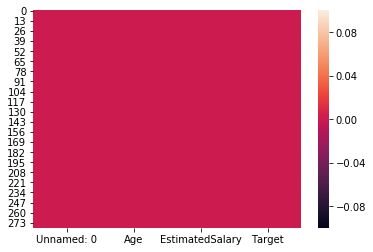

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.head()

,Age,EstimatedSalary,Target
0,-1.017692,-1.548776,0
1,0.415005,2.327385,1
2,-0.731153,0.271845,0
3,-0.253587,-0.374182,0
4,1.274623,1.886912,0


In [9]:
from sklearn.svm import SVC

In [10]:
cl = SVC()

In [11]:
X = df.drop('Target',axis=1)

In [12]:
X.head()

,Age,EstimatedSalary
0,-1.017692,-1.548776
1,0.415005,2.327385
2,-0.731153,0.271845
3,-0.253587,-0.374182
4,1.274623,1.886912


In [13]:
y = df['Target']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.3)

In [16]:
len(y_train)

196

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
Age                280 non-null float64
EstimatedSalary    280 non-null float64
Target             280 non-null int64
dtypes: float64(2), int64(1)
memory usage: 6.6 KB


In [18]:
cl.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
ypred = cl.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(ypred,y_test)

array([[51,  1],
       [ 2, 30]], dtype=int64)